# Author : Mukesh kumar
## KPMG Virtual Internship
### The Innovation and Digital Solutions Division
_KPMG’s Analytics, Information & Modelling group helps organisations take the mystery out of big data and show them how to leverage their data resources to produce better business outcomes._

## Task 1 - Data Quality
- Assessment of data quality and completeness in preparation for analysis.

## Task 2 - Data Insights
- Targeting high value customers based on customer demographics and attributes.

## Task 3 - Data Insights and presentation
- will Use Visualisations to present insights

_The client provided KPMG with 3 datasets:_ <br>
**1.Customer Demographic**

**2.Customer Addresses**

**3.Transactions data in the past 3 months**

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing some important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading all the excel sheets

In [3]:

path = "KPMG internship.xlsx"

transaction = pd.read_excel(path,sheet_name="Transactions")
NewCustomerList = pd.read_excel(path,sheet_name="NewCustomerList")
CustomerDemographic= pd.read_excel(path,sheet_name="CustomerDemographic")
CustomerAddress = pd.read_excel(path,sheet_name="CustomerAddress")

# Sheet 1
##  Exploring Transaction dataset

In [4]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
print(f"Rowss:{transaction.shape[0]}")
print(f"Columns:{transaction.shape[1]}")

Rowss:20000
Columns:13


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


__we saw that the column "product_first_sold_date"  has the product first sold date with int data type ,So we have to change this datatype__


In [8]:
transaction["product_first_sold_date"] = pd.to_datetime(transaction["product_first_sold_date"],unit="s")
transaction["product_first_sold_date"].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

_In the *product_first_sold_date* the data is not correct becuase  it shows that all the things are done on the same date_

In [9]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

__Now we have to drop these rows with null values__

In [10]:
transaction = transaction[~(transaction["online_order"].isnull())]
transaction = transaction[~(transaction["brand"].isnull())]
transaction = transaction[~(transaction["product_line"].isnull())]
transaction = transaction[~(transaction["product_class"].isnull())]
transaction = transaction[~(transaction["product_size"].isnull())]
transaction = transaction[~(transaction["standard_cost"].isnull())]
transaction = transaction[~(transaction["product_first_sold_date"].isnull())]

In [11]:
transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [12]:
transaction.online_order.isnull().sum()

0

In [13]:
# checking the uniquenes of the columns
transaction.nunique()

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

_Now we will check the value counts of all the categorical columns_

In [14]:
col = ["online_order","order_status","brand","product_line","product_class","product_size"]

In [15]:
for i in transaction[col]:
#     print(i)
    print(transaction[i].value_counts())
    print("\n")

1.0    9739
0.0    9706
Name: online_order, dtype: int64


Approved     19273
Cancelled      172
Name: order_status, dtype: int64


Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64


Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64


medium    13587
high       2952
low        2906
Name: product_class, dtype: int64


medium    12767
large      3900
small      2778
Name: product_size, dtype: int64




__Checking for the duplicates items__

In [16]:
transaction[transaction.duplicated()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


__Checking for the profit__

In [17]:
transaction["profit"]= transaction["list_price"]-transaction["standard_cost"]
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


In [18]:
transaction.shape

(19445, 14)

# Sheet 2
## Exploring customer Demographic data

In [19]:
CustomerDemographic.head(7)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0


In [20]:
# checking rows and columns
print(f"Rows:{CustomerDemographic.shape[0]}")
print(f"Columns:{CustomerDemographic.shape[1]}")

Rows:4000
Columns:13


In [21]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [22]:
# checking the description
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


#### Checking for the null values


In [23]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

- Now we have to drop the columns with null values
    - But we couldn't drop the column "last_name" as it does not affect that to the data

In [24]:
# CustomerDemographic =  CustomerDemographic[~(CustomerDemographic["DOB"].isnull())]
CustomerDemographic =  CustomerDemographic[~CustomerDemographic["job_title"].isnull()]
CustomerDemographic =  CustomerDemographic[~CustomerDemographic["job_industry_category"].isnull()]
CustomerDemographic =  CustomerDemographic[~CustomerDemographic["default"].isnull()]
CustomerDemographic =  CustomerDemographic[~CustomerDemographic["tenure"].isnull()]


In [25]:
CustomerDemographic.isnull().sum()

customer_id                             0
first_name                              0
last_name                              80
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
default                                 0
owns_car                                0
tenure                                  0
dtype: int64

__Checking for the uniqueness of the columns__

In [26]:
CustomerDemographic.nunique().sort_values(ascending=False)

customer_id                            2710
last_name                              2560
DOB                                    2481
first_name                             2284
job_title                               195
past_3_years_bike_related_purchases     100
default                                  90
tenure                                   22
job_industry_category                     9
gender                                    4
wealth_segment                            3
owns_car                                  2
deceased_indicator                        2
dtype: int64

__we see that the in gender column there are 4 value_count so have take a look  on that part__

In [27]:
CustomerDemographic.gender.value_counts()

Female    1401
Male      1307
Femal        1
F            1
Name: gender, dtype: int64

In [28]:
CustomerDemographic.gender = CustomerDemographic.gender.replace("F","Female")
CustomerDemographic.gender = CustomerDemographic.gender.replace("Femal","Female")

In [29]:
CustomerDemographic.gender.value_counts()

Female    1403
Male      1307
Name: gender, dtype: int64

In [30]:
# Now the defualt col
CustomerDemographic.default.value_counts()

1                                   89
-1                                  81
100                                 76
-100                                71
ï½ï½¨(Â´âï½â©                       47
                                    ..
ç°ä¸­ããã«ããã¦ä¸ãã                   21
âªâªtestâª                          20
ð¾ ð ð ð ð ð ð ð                    20
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ              20
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ    17
Name: default, Length: 90, dtype: int64

_i think this of no use ,we have to drop this column_

In [31]:
CustomerDemographic.drop("default",axis=1,inplace=True)

In [32]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [33]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [34]:
# checking for the categorical columns
col = ["job_industry_category","gender","wealth_segment","owns_car","deceased_indicator"]
for i in CustomerDemographic[col]:
    print(i)
    print(CustomerDemographic[i].value_counts())
    print("\n")

job_industry_category
Manufacturing         659
Financial Services    646
Health                509
Retail                285
Property              224
IT                    122
Entertainment         115
Argiculture            93
Telecommunications     57
Name: job_industry_category, dtype: int64


gender
Female    1403
Male      1307
Name: gender, dtype: int64


wealth_segment
Mass Customer        1343
High Net Worth        695
Affluent Customer     672
Name: wealth_segment, dtype: int64


owns_car
Yes    1400
No     1310
Name: owns_car, dtype: int64


deceased_indicator
N    2708
Y       2
Name: deceased_indicator, dtype: int64




#### Lets get some work on the age of the customer

In [35]:
CustomerDemographic["year"] = pd.DatetimeIndex(CustomerDemographic.DOB).year
CustomerDemographic["month"] = pd.DatetimeIndex(CustomerDemographic.DOB).month

In [36]:
CustomerDemographic["Age"] = 2021-CustomerDemographic["year"]
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33


In [37]:
CustomerDemographic[CustomerDemographic["Age"]>90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age


### Now we are done CustomerDemograhic dataset


# Sheet 3
## Exploring the Customer address

In [38]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [39]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [40]:
# Lets see the shape of the data
print(f"Rows:{CustomerAddress.shape[0]}")
print(f"Columns:{CustomerAddress.shape[1]}")

Rows:3999
Columns:6


In [41]:
# checking for the null values
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [42]:
# checking for the uniqueness
CustomerAddress.nunique().sort_values(ascending=False)

customer_id           3999
address               3996
postcode               873
property_valuation      12
state                    5
country                  1
dtype: int64

In [43]:
# Now we have to wrok in state col
CustomerAddress.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [44]:
CustomerAddress["state"] = CustomerAddress["state"].replace("NSW","New South Wales")
CustomerAddress["state"] = CustomerAddress["state"].replace("VIC","Victoria")
CustomerAddress.state.value_counts()

New South Wales    2140
Victoria           1021
QLD                 838
Name: state, dtype: int64

### we are done with CustomerAddress

# Sheet 4
## Now we have to work on New Customer list dataset


In [45]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.07,1.3375,1.671875,1.421094,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.062500,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.92,0.9200,0.920000,0.920000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.037500,1.037500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.83,0.8300,1.037500,1.037500,4,4,1.703125


In [46]:
# checking the shape of the dataset
print(f"Rows:{NewCustomerList.shape[0]}")
print(f"Columns:{NewCustomerList.shape[1]}")

Rows:1000
Columns:23


In [47]:
NewCustomerList.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [48]:
# checking the informatiion of the dataset
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [49]:
# describe the data
NewCustomerList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747760,0.839620,0.944339,0.872949,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.205144,0.249039,0.299118,0.288259,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.630000,0.708281,0.637500,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.735000,0.820000,0.920000,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.037500,1.150000,1.070781,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [50]:
NewCustomerList.isnull().sum().sort_values(ascending=False)

job_industry_category                  165
job_title                              106
last_name                               29
DOB                                     17
Value                                    0
tenure                                   0
gender                                   0
past_3_years_bike_related_purchases      0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
address                                  0
Rank                                     0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
first_name                               0
dtype: int6

we have to drop the null values from the columns ["DOB","job_industry_category","job_title"]
their is no problem with null values in the column named as **last_name** becuase it will be okay to work with **first_name**

In [51]:
NewCustomerList = NewCustomerList[~(NewCustomerList["DOB"].isnull())]
NewCustomerList = NewCustomerList[~(NewCustomerList["job_title"].isnull())]
NewCustomerList = NewCustomerList[~(NewCustomerList["job_industry_category"].isnull())]


In [52]:
NewCustomerList.isnull().sum()

first_name                              0
last_name                              20
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Unnamed: 16                             0
Unnamed: 17                             0
Unnamed: 18                             0
Unnamed: 19                             0
Unnamed: 20                             0
Rank                                    0
Value                                   0
dtype: int64

### Now we saw that there are 5  unnamed columns  So we have to drop this

In [53]:
NewCustomerList = NewCustomerList.drop(["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"],axis=1)

In [54]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure        

In [55]:
# Checking the uniqueness of the data
NewCustomerList.nunique().sort_values(ascending=False)

address                                735
DOB                                    720
last_name                              709
first_name                             701
postcode                               442
Rank                                   292
Value                                  292
job_title                              178
past_3_years_bike_related_purchases     99
tenure                                  22
property_valuation                      12
job_industry_category                    9
state                                    3
wealth_segment                           3
owns_car                                 2
gender                                   2
country                                  1
deceased_indicator                       1
dtype: int64

In [56]:
# checking for the categorical values
col=["job_industry_category","state","wealth_segment","owns_car","gender"]
for i in NewCustomerList[col]:
    print(i)
    print(NewCustomerList[i].value_counts())
    print("\n")

job_industry_category
Financial Services    187
Manufacturing         175
Health                138
Retail                 73
Property               51
Entertainment          34
IT                     30
Argiculture            24
Telecommunications     23
Name: job_industry_category, dtype: int64


state
NSW    364
VIC    200
QLD    171
Name: state, dtype: int64


wealth_segment
Mass Customer        369
High Net Worth       184
Affluent Customer    182
Name: wealth_segment, dtype: int64


owns_car
No     376
Yes    359
Name: owns_car, dtype: int64


gender
Female    380
Male      355
Name: gender, dtype: int64




_we could do one thing that lets find the age of the people_

In [57]:
NewCustomerList["year"]=pd.DatetimeIndex(NewCustomerList["DOB"]).year
NewCustomerList["month"] = pd.DatetimeIndex(NewCustomerList["DOB"]).month
NewCustomerList["Age"] = 2021-NewCustomerList["year"]
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Rank,Value,year,month,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965,9,56


_Lets check is there any wrong values in age col_

In [58]:
NewCustomerList[NewCustomerList["Age"]>90]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Rank,Value,year,month,Age


In [59]:
NewCustomerList.state.value_counts()

NSW    364
VIC    200
QLD    171
Name: state, dtype: int64

### Now lets work on the "state" col


In [60]:
NewCustomerList["state"] =NewCustomerList.state.replace("NSW","New South Wales")
NewCustomerList["state"] = NewCustomerList.state.replace("VIC","Victoria")

In [61]:
NewCustomerList.state.value_counts()

New South Wales    364
Victoria           200
QLD                171
Name: state, dtype: int64

In [62]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Rank,Value,year,month,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,14 Mccormick Park,2113,New South Wales,Australia,11,1,1.718750,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5 Colorado Crossing,3505,Victoria,Australia,5,1,1.718750,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,115 Montana Place,2093,New South Wales,Australia,9,4,1.703125,1965,9,56


# Merging the dataset

#### We need to add the CustomerDemographic to CustomerAddress

In [63]:
CustomerDemographic.head(2)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41


In [64]:
CustomerAddress.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [65]:
# merging both the datasets on customer id
CustomerDemographic = pd.merge(CustomerDemographic,CustomerAddress,on="customer_id",how="left")
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year', 'month', 'Age', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [66]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN


In [67]:
# Adding one age_group column
CustomerDemographic["age_group"] = pd.cut(CustomerDemographic.Age,[0,30,40,50,60,99],labels=["<30","30-40","40-50","50-60","60+"])
CustomerDemographic.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,year,month,Age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50


In [68]:
CustomerDemographic.customer_id.iloc[-1]

3997

_Now we have to merge the newcustomer dataset to Customerdemogrphic dataset but the problem is that **NewCustomer** dataset have no column for the **customer_id** so we  work on new customer dataset to add the *customer_id*_
- As we have to add this data set vertically 
    - So the customer_id will be starts through the end of the demographic datset


In [69]:
NewCustomerList.insert(0,"customer_id",range(3998,3998+len(NewCustomerList)))
NewCustomerList.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,address,postcode,state,country,property_valuation,Rank,Value,year,month,Age
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,1957,7,64
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,14 Mccormick Park,2113,New South Wales,Australia,11,1,1.71875,1970,3,51


In [70]:
# Also we have to do for the age group
NewCustomerList["age_group"] = pd.cut(NewCustomerList.Age ,[0,30,40,50,60,99],labels=["<30","30-40","40-50","50-60","60+"])
NewCustomerList.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,postcode,state,country,property_valuation,Rank,Value,year,month,Age,age_group
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,4500,QLD,Australia,6,1,1.71875,1957,7,64,60+
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,2113,New South Wales,Australia,11,1,1.71875,1970,3,51,50-60


In [71]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          735 non-null    int32         
 1   first_name                           735 non-null    object        
 2   last_name                            715 non-null    object        
 3   gender                               735 non-null    object        
 4   past_3_years_bike_related_purchases  735 non-null    int64         
 5   DOB                                  735 non-null    datetime64[ns]
 6   job_title                            735 non-null    object        
 7   job_industry_category                735 non-null    object        
 8   wealth_segment                       735 non-null    object        
 9   deceased_indicator                   735 non-null    object        
 10  owns_car      

In [72]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 2709
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2710 non-null   int64         
 1   first_name                           2710 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2710 non-null   object        
 4   past_3_years_bike_related_purchases  2710 non-null   int64         
 5   DOB                                  2710 non-null   datetime64[ns]
 6   job_title                            2710 non-null   object        
 7   job_industry_category                2710 non-null   object        
 8   wealth_segment                       2710 non-null   object        
 9   deceased_indicator                   2710 non-null   object        
 10  owns_car    

#### Merging  NewCustomerlist with the demographic data

In [73]:
New_df = pd.concat([CustomerDemographic,NewCustomerList],ignore_index=True,axis=0)
New_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,month,Age,address,postcode,state,country,property_valuation,age_group,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,1,67,NaN,NaN,NaN,NaN,NaN,60+,NaN,NaN
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50,NaN,NaN
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,...,10,33,NaN,NaN,NaN,NaN,NaN,30-40,NaN,NaN


In [74]:
New_df.shape

(3445, 23)

In [75]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3445 non-null   int64         
 1   first_name                           3445 non-null   object        
 2   last_name                            3345 non-null   object        
 3   gender                               3445 non-null   object        
 4   past_3_years_bike_related_purchases  3445 non-null   int64         
 5   DOB                                  3445 non-null   datetime64[ns]
 6   job_title                            3445 non-null   object        
 7   job_industry_category                3445 non-null   object        
 8   wealth_segment                       3445 non-null   object        
 9   deceased_indicator                   3445 non-null   object        
 10  owns_car    

In [76]:
CustomerDemographic = New_df
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3445 non-null   int64         
 1   first_name                           3445 non-null   object        
 2   last_name                            3345 non-null   object        
 3   gender                               3445 non-null   object        
 4   past_3_years_bike_related_purchases  3445 non-null   int64         
 5   DOB                                  3445 non-null   datetime64[ns]
 6   job_title                            3445 non-null   object        
 7   job_industry_category                3445 non-null   object        
 8   wealth_segment                       3445 non-null   object        
 9   deceased_indicator                   3445 non-null   object        
 10  owns_car    

##### Now we add the transaction dataset to the demographic data

In [77]:
transaction_excitingCustomer = transaction
transaction_excitingCustomer.sort_values("customer_id",ascending=True).head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,110.56
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23,189.28
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,509.97
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53,17.87
15662,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,431.33


In [78]:
# merging dataset
# columns we want to merge with the transaction data set
col = ["customer_id","gender","past_3_years_bike_related_purchases","job_title","job_industry_category","owns_car","Age","age_group","wealth_segment",
       "postcode","state","country","property_valuation"]

transaction_excitingCustomer = pd.merge(transaction_excitingCustomer,CustomerDemographic[col],on="customer_id",how="left")

In [79]:
transaction_excitingCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [80]:
# making the data in ascending order on  the transection date

transaction_excitingCustomer.sort_values("transaction_date",ascending=False).head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,owns_car,Age,age_group,wealth_segment,postcode,state,country,property_valuation
10617,10905,0,2659,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,...,Professor,Argiculture,Yes,47.0,40-50,High Net Worth,4151.0,QLD,Australia,4.0
2230,2285,95,3216,2017-12-30,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Database Administrator III,Manufacturing,Yes,23.0,<30,Mass Customer,4390.0,QLD,Australia,7.0
7328,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,...,Computer Systems Analyst II,Property,No,23.0,<30,Mass Customer,3174.0,Victoria,Australia,8.0
1008,1033,49,934,2017-12-30,0.0,Approved,Trek Bicycles,Road,medium,medium,...,Human Resources Manager,Manufacturing,No,25.0,<30,Mass Customer,2036.0,New South Wales,Australia,12.0
15799,16258,14,2055,2017-12-30,1.0,Approved,Solex,Standard,high,large,...,Administrative Assistant III,Retail,No,41.0,40-50,High Net Worth,2327.0,New South Wales,Australia,3.0


_We saw that the transaction_date have all the transaction on same day **2017-12-30** which will be the comparison date_ 
- We will make new columns names as **recency**= **camparison_date - transaction_date**


In [81]:
transaction_excitingCustomer["transaction_date"] = pd.to_datetime(transaction_excitingCustomer["transaction_date"]).dt.date
transaction_excitingCustomer["recency"] = 0


In [82]:
transaction_excitingCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [83]:
import datetime

comparison_date = datetime.date(2017, 12, 30)

for i in range(19445):
    if transaction_excitingCustomer['transaction_date'][i] == 0:
        pass
    else:
        x = comparison_date - transaction_excitingCustomer['transaction_date'][i]
        transaction_excitingCustomer["recency"][i] = x.days

__Checking for the null values__

In [84]:
transaction_excitingCustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 6060
past_3_years_bike_related_purchases    6060
job_title                              6060
job_industry_category                  6060
owns_car                               6060
Age                                    6060
age_group                              6060
wealth_segment                         6060
postcode                        

In [85]:
transaction_excitingCustomer  = transaction_excitingCustomer[~transaction_excitingCustomer["gender"].isnull()]
transaction_excitingCustomer.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
profit                                  0
gender                                  0
past_3_years_bike_related_purchases     0
job_title                               0
job_industry_category                   0
owns_car                                0
Age                                     0
age_group                               0
wealth_segment                          0
postcode                               12
state                             

In [86]:
transaction_excitingCustomer  = transaction_excitingCustomer[~transaction_excitingCustomer["postcode"].isnull()]
transaction_excitingCustomer.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
owns_car                               0
Age                                    0
age_group                              0
wealth_segment                         0
postcode                               0
state                                  0
country         

__We are done with handling the null values__
- What we got is:
    - All the combined data 
    - New data frame **transaction_exictingCustomer**
----------------------------------------------------------------------------------------------------------------------------
 
## Now will be running a RFM Analysis for exsisiting customer

 - RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.

In [87]:
transaction_excitingCustomer.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,Age,postcode,property_valuation,recency
count,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000
mean,9980.172213,45.557691,1716.267105,0.499589,1109.668678,558.264423,551.404255,49.225230,43.710985,2991.050550,7.505720,181.807822
std,5755.129015,30.500184,1014.420239,0.500019,585.054039,410.021267,494.092101,28.733519,12.552498,860.389394,2.831714,105.518148
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.000000,19.000000,2000.000000,1.000000,0.000000
25%,5027.000000,18.000000,818.000000,0.000000,575.270000,215.140000,133.780000,25.000000,34.000000,2194.000000,6.000000,89.000000
50%,9954.000000,44.000000,1719.000000,0.000000,1163.890000,507.580000,445.210000,48.000000,44.000000,2765.000000,8.000000,181.000000
75%,14945.000000,72.000000,2590.000000,1.000000,1635.300000,795.100000,827.160000,73.000000,53.000000,3756.000000,10.000000,273.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,1702.550000,99.000000,90.000000,4883.000000,12.000000,363.000000


**Only the transactions made in the last 2 years are considered for analysis.**

In [88]:
transaction_excitingCustomer = transaction_excitingCustomer[transaction_excitingCustomer["recency"]<730]
transaction_excitingCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13373 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13373 non-null  int64         
 1   product_id                           13373 non-null  int64         
 2   customer_id                          13373 non-null  int64         
 3   transaction_date                     13373 non-null  object        
 4   online_order                         13373 non-null  float64       
 5   order_status                         13373 non-null  object        
 6   brand                                13373 non-null  object        
 7   product_line                         13373 non-null  object        
 8   product_class                        13373 non-null  object        
 9   product_size                         13373 non-null  object        
 10  list_price

In [89]:
rfmTable = transaction_excitingCustomer.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                                                      'product_id': lambda x: len(x), 
                                                                      'profit': lambda x: x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)

In [90]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38


In [91]:
rfmTable["monetary_value"] = rfmTable["monetary_value"].astype(int)

In [92]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018
2,128,3,2226
9,78,6,2353
12,67,7,3540
13,27,7,4337


In [93]:
quartiles = rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.00     0.00        1.0           15.00
0.25    18.00        4.0         1785.50
0.50    45.00        5.0         2793.00
0.75    87.75        7.0         4111.75
0.99   272.15       12.0         8252.00 <class 'pandas.core.frame.DataFrame'>


In [94]:
rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0

In [95]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,0,0,0
2,128,3,2226,0,0,0
9,78,6,2353,0,0,0
12,67,7,3540,0,0,0
13,27,7,4337,0,0,0
...,...,...,...,...,...,...
3493,93,6,3728,0,0,0
3494,4,4,2755,0,0,0
3495,13,7,3847,0,0,0


#### Calculating R score

In [96]:
rfmTable.index

Int64Index([   1,    2,    9,   12,   13,   14,   15,   19,   20,   21,
            ...
            3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497],
           dtype='int64', name='customer_id', length=2398)

In [97]:
rfmTable["recency"][2]

128

In [98]:
for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 76:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=76) & ((int(rfmTable["recency"][i])) > 35):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=35) & ((int(rfmTable["recency"][i])) > 8):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4

In [99]:
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,0
2,128,3,2226,1,0,0
9,78,6,2353,1,0,0
12,67,7,3540,2,0,0
13,27,7,4337,3,0,0


In [100]:
for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4096:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4096) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1785):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,3
2,128,3,2226,1,0,2
9,78,6,2353,1,0,2
12,67,7,3540,2,0,3
13,27,7,4337,3,0,4


In [101]:
rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]

In [102]:
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,7,11,3018,4,0,3,403
2,128,3,2226,1,0,2,102
9,78,6,2353,1,0,2,102
12,67,7,3540,2,0,3,203
13,27,7,4337,3,0,4,304


In [103]:
quartiles = rfmTable["RFM_Value"].quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

0.00    101.0
0.25    103.0
0.50    203.0
0.75    303.0
0.99    404.0
Name: RFM_Value, dtype: float64 <class 'pandas.core.series.Series'>


In [104]:
rfmTable["Customer_Profile"] = " "


In [105]:
for i in rfmTable.index:
    if (int(rfmTable["RFM_Value"][i])) > 411:
        rfmTable["Customer_Profile"][i] = "Platinum Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=411) & ((int(rfmTable["RFM_Value"][i])) > 311):
        rfmTable["Customer_Profile"][i] = "Silver Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=311) & ((int(rfmTable["RFM_Value"][i])) > 160):
        rfmTable["Customer_Profile"][i] = "Gold Customer"
    else:
        rfmTable["Customer_Profile"][i] = "Bronze Customer"
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value,Customer_Profile
customer_id,,,,,,,,
1,7,11,3018,4,0,3,403,Silver Customer
2,128,3,2226,1,0,2,102,Bronze Customer
9,78,6,2353,1,0,2,102,Bronze Customer
12,67,7,3540,2,0,3,203,Gold Customer
13,27,7,4337,3,0,4,304,Gold Customer


In [106]:
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()

Customer_Profile
Bronze Customer     73951
Gold Customer      351009
Silver Customer    118831
Name: RFM_Value, dtype: int64

In [107]:
df_customerprofile = rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()
df_customerprofile

Customer_Profile
Bronze Customer     73951
Gold Customer      351009
Silver Customer    118831
Name: RFM_Value, dtype: int64

In [108]:
df_customerprofile.index

Index(['Bronze Customer', 'Gold Customer', 'Silver Customer'], dtype='object', name='Customer_Profile')

In [109]:
df_customerprofile.values

array([ 73951, 351009, 118831], dtype=int64)

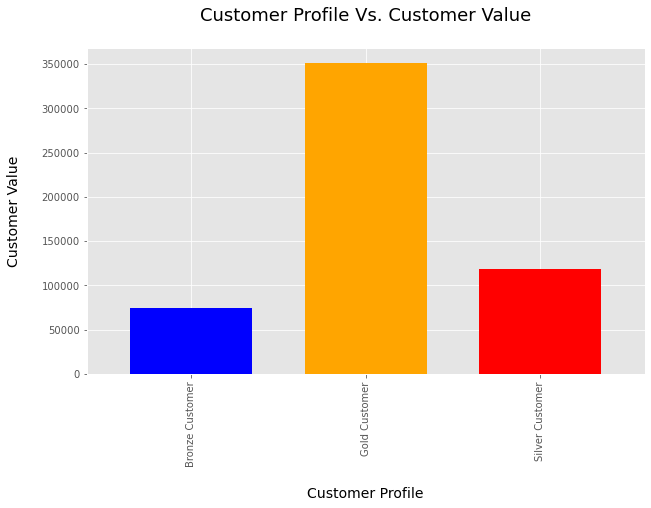

In [110]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title("Customer Profile Vs. Customer Value\n", fontsize=18)

rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum().plot(kind="bar", width=0.7, color=["blue","orange","red","green"])

plt.xlabel("\nCustomer Profile", fontsize=14,color="black")
plt.ylabel("Customer Value\n",fontsize=14, color="black")

    
plt.show()

*The above bar graph implies that -** 
 - `**gold Customer**` has a good range of customers.
 - `**gold Customer**` has high customer value as compared to other customer profiles.
 
-----------------------------------------------------------------------------------------------------------------------------

### Age Cluster to shows which wealth segment brings more profit on the tabel

In [111]:
res1 = pd.pivot_table(data=transaction_excitingCustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum)
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,376867.47,319343.99,650838.27
30-40,331680.89,348206.11,641782.97
40-50,600168.87,652188.79,1288123.46
50-60,330056.75,348280.37,646548.63
60+,216529.51,210691.11,412621.91


In [112]:
res1["Affluent Customer"] = res1["Affluent Customer"].astype(int)
res1["High Net Worth"] = res1["High Net Worth"].astype(int)
res1["Mass Customer"] = res1["Mass Customer"].astype(int)

In [113]:
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,376867,319343,650838
30-40,331680,348206,641782
40-50,600168,652188,1288123
50-60,330056,348280,646548
60+,216529,210691,412621


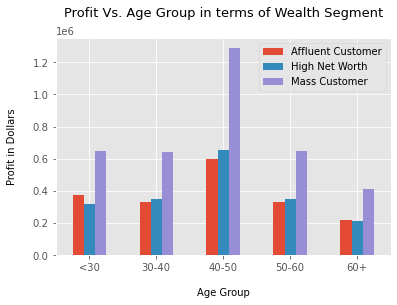

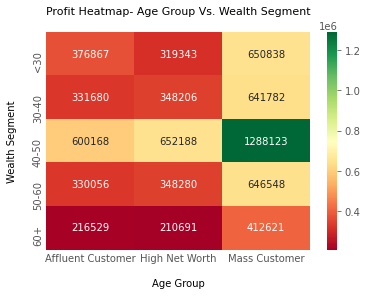

In [114]:
pd.pivot_table(data=transaction_excitingCustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum).plot(kind='bar')
plt.title("Profit Vs. Age Group in terms of Wealth Segment\n", fontsize=13)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Profit in Dollars\n",fontsize=10, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.figure(figsize=[13,4])
plt.subplot(1,2,1)

plt.title("Profit Heatmap- Age Group Vs. Wealth Segment\n", fontsize=11)
ax = sns.heatmap(res1, annot=True, cmap="RdYlGn", fmt='d')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Wealth Segment\n",fontsize=10,color="black")
plt.show()

plt.show()

**From the above heatmap and bar graph**

- Age Group `**40-50**` giving the highest profit.
  - Based on that the wealth segment `**Mass Customers**` has overall performance better.
  

### Find number of cars owned as per the location

In [115]:
transaction_excitingCustomer["owns_car"].value_counts()

Yes    6846
No     6527
Name: owns_car, dtype: int64

In [116]:
transaction_excitingCustomer["owns_car_flag"]=np.where(transaction_excitingCustomer["owns_car"]=="Yes",1,0)

In [117]:
transaction_excitingCustomer.groupby(["state","owns_car"])["owns_car_flag"].count()

state            owns_car
New South Wales  No          3469
                 Yes         3682
QLD              No          1451
                 Yes         1471
Victoria         No          1607
                 Yes         1693
Name: owns_car_flag, dtype: int64

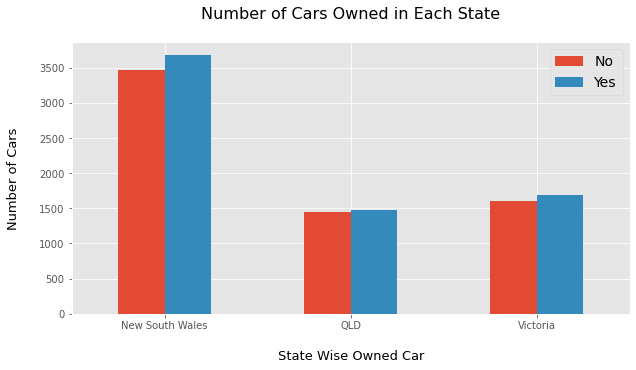

In [118]:
pd.pivot_table(data=transaction_excitingCustomer, index="state", columns="owns_car", values="owns_car_flag",aggfunc='count').plot(kind='bar',figsize=[10,5])
plt.title("Number of Cars Owned in Each State\n", fontsize=16)
plt.xlabel("\nState Wise Owned Car", fontsize=13,color="black")
plt.ylabel("Number of Cars\n",fontsize=13, color="black")
plt.legend(loc='upper right',fontsize=14)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph implies**
 - `New South Wales` holds high number of owned cars as compared to other states of Australia.
 
-------------------------------------------------------------------------------------------------

## Find total bikes purchased by each customer based on his/her job_industry

In [119]:
transaction_excitingCustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()

job_industry_category
Argiculture            457
Entertainment          580
Financial Services    3179
Health                2592
IT                     570
Manufacturing         3277
Property              1063
Retail                1369
Telecommunications     286
Name: past_3_years_bike_related_purchases, dtype: int64

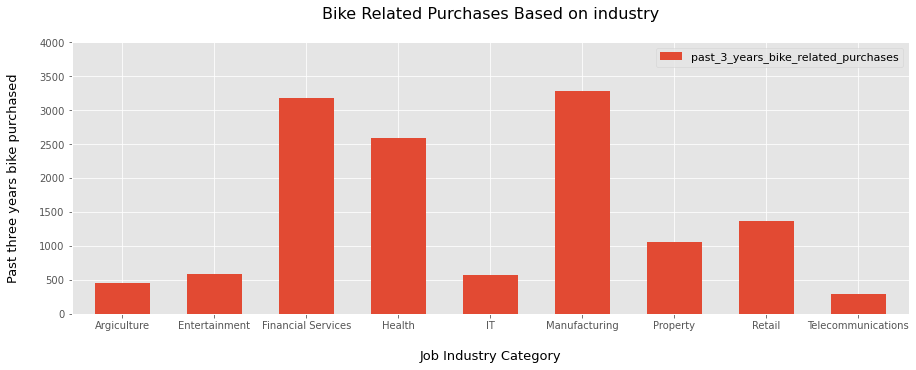

In [120]:
transaction_excitingCustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Bike Related Purchases Based on industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Past three years bike purchased\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(0,4500,500))

plt.legend(loc='upper right',fontsize=11)


plt.show()

**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds a high record in terms of bike purchased in last 3 years.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find which industry sector brings up the highest profit on the tabel

In [121]:
transaction_excitingCustomer.groupby("job_industry_category")["profit"].sum().round()

job_industry_category
Argiculture            240521.0
Entertainment          320832.0
Financial Services    1804117.0
Health                1407997.0
IT                     309489.0
Manufacturing         1783947.0
Property               584378.0
Retail                 769506.0
Telecommunications     153142.0
Name: profit, dtype: float64

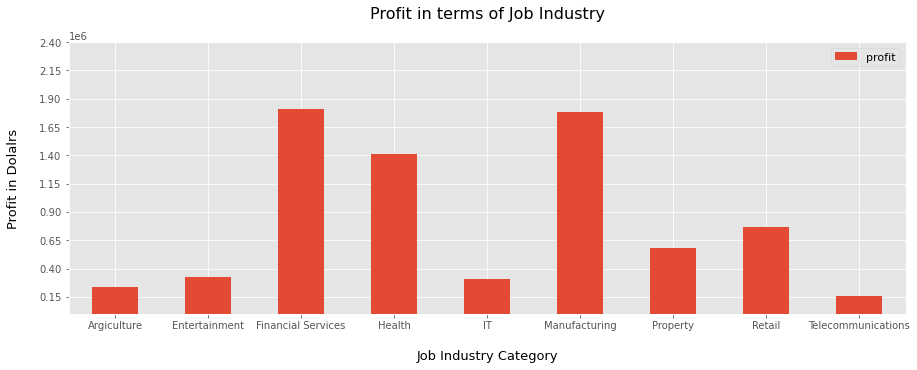

In [122]:
transaction_excitingCustomer.groupby("job_industry_category")["profit"].sum().round().plot(kind="bar",figsize=[15,5],width=0.5)

# labeling
plt.title("Profit in terms of Job Industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Profit in Dolalrs\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(150000,2500000,250000))
plt.legend(loc='upper right',fontsize=11)


**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds high profit.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find past three year bike purchase on the bases of gender and age group

In [123]:
pd.pivot_table(data=transaction_excitingCustomer,columns="age_group",index="gender",values= "past_3_years_bike_related_purchases",aggfunc="count")

age_group,<30,30-40,40-50,50-60,60+
gender,,,,,
Female,1183,1185,2428,1190,790
Male,1277,1147,2248,1145,780


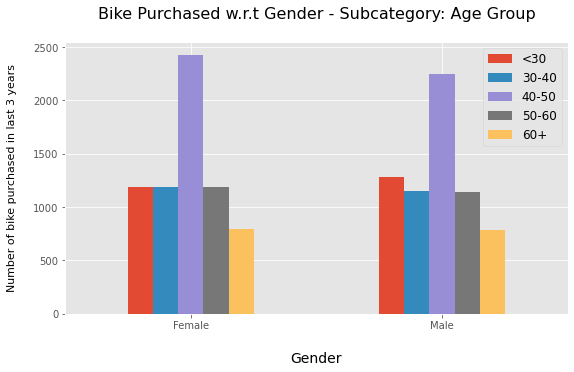

In [124]:
pd.pivot_table(data=transaction_excitingCustomer,columns="age_group",index="gender",values= "past_3_years_bike_related_purchases",aggfunc="count").plot(kind="bar",figsize=[9,5])


plt.title("Bike Purchased w.r.t Gender - Subcategory: Age Group\n", fontsize=16)
plt.xlabel("\nGender", fontsize=14,color="black")
plt.ylabel("Number of bike purchased in last 3 years\n",fontsize=11, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph**
 - Age group `**40-50**` has high count in terms of bike purchased in last 3 years within that Female ratio a bit higher.
 
 
-------------------------------------------------------------------------------------------------------------------------------


# Dataframe with high value customers

In [125]:
df1 = transaction_excitingCustomer[transaction_excitingCustomer["age_group"]=="40-50"]
df1.shape

(4676, 28)

In [126]:
df2 = df1[df1["wealth_segment"]=="Mass Customer"]
df2.shape

(2364, 28)

In [127]:
F = df2[df2["job_industry_category"]=="Financial Services"]
F.shape

(465, 28)

In [128]:
M = df2[df2["job_industry_category"]=="Manufacturing"]
M.shape

(597, 28)

In [129]:
H = df2[df2["job_industry_category"] == "Health"]
H.shape

(564, 28)

In [130]:
F = pd.concat([F,M],ignore_index=True,sort=False)
F.shape

(1062, 28)

In [131]:
F = pd.concat([F,H],ignore_index=True,sort=False)
F.shape

(1626, 28)

In [132]:
df_highValue_customers = F
df_highValue_customers.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,Age,age_group,wealth_segment,postcode,state,country,property_valuation,recency,owns_car_flag
0,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,...,No,44.0,40-50,Mass Customer,2250.0,New South Wales,Australia,8.0,211,0
1,22,37,595,2017-06-29,1.0,Approved,OHM Cycles,Standard,low,medium,...,No,48.0,40-50,Mass Customer,4305.0,QLD,Australia,4.0,184,0
2,41,44,2570,2017-05-08,1.0,Approved,WeareA2B,Standard,medium,medium,...,Yes,44.0,40-50,Mass Customer,4812.0,QLD,Australia,3.0,236,1
3,95,45,757,2017-02-26,0.0,Approved,Solex,Standard,medium,medium,...,No,44.0,40-50,Mass Customer,4019.0,QLD,Australia,8.0,307,0
4,104,78,1468,2017-09-12,0.0,Approved,Giant Bicycles,Standard,medium,large,...,No,43.0,40-50,Mass Customer,2519.0,New South Wales,Australia,9.0,109,0


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

-------------------------------------------------------------------------------`**End Of Note Book**`----------------------------------------------------------------------------------------------

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Exporting pandas Dataframe to CSV file


In [133]:
transaction_excitingCustomer.to_csv("Excisting_Customer_Transaction.csv")


In [134]:
df_highValue_customers.to_csv("High_value_customers.csv")